In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import konlpy
from konlpy.tag import Okt
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import re

Using TensorFlow backend.


In [2]:
df = pd.read_excel("C:/Users/min-sung.lee/SK/test_all3.xlsx")

In [9]:
country_list = df['countryName'].values.tolist()

In [10]:
from konlpy.tag import Okt

stopwords = ['콜센터', '등', '및', '번호', '전', '하다', '하여', '월', '화', '수', '목', '금', '토', '일']

stopwords += country_list

title_noun_list = []
okt = Okt()

for i in range(len(df)):
    _x = df.iloc[i]['title']
    
    okt_morphs = okt.pos(_x)  # 튜플반환
    temp_x = []
    for word, pos in okt_morphs:
        if pos == 'Noun':
            temp_x.append(word)
            
    temp_x = [word for word in temp_x if not word in stopwords]
    title_noun_list += temp_x
    

In [12]:
from collections import Counter
c = Counter(title_noun_list)


[('안전', 2136), ('관련', 1687), ('유의', 1340), ('공지', 1072), ('주의', 948), ('발생', 903), ('안내', 786), ('신변', 786), ('테러', 708), ('지역', 554), ('시', 379), ('시위', 361), ('여행', 303), ('내', 294), ('당부', 267), ('사건', 261), ('사항', 231), ('피해', 225), ('치안', 212), ('우리', 209), ('유의사항', 205), ('국민', 189), ('폭탄', 168), ('강도', 166), ('지진', 158), ('범죄', 138), ('감염', 131), ('경보', 129), ('동향', 127), ('사기', 124), ('확산', 123), ('사태', 119), ('입국', 115), ('대상', 114), ('방문', 114), ('예방', 114), ('사고', 114), ('주', 112), ('외국인', 108), ('뎅기열', 101), ('위협', 101), ('바이러스', 95), ('자제', 94), ('기간', 93), ('강화', 91), ('소매치기', 91), ('악화', 90), ('이용', 88), ('여행객', 86), ('대규모', 86), ('차량', 86), ('행시', 84), ('남부', 81), ('정세', 79), ('정보', 78), ('체류', 75), ('발령', 75), ('납치', 73), ('상황', 72), ('태풍', 72), ('북부', 71), ('증가', 69), ('중', 68), ('불안', 67), ('환자', 67), ('대비', 67), ('화산', 64), ('공항', 63), ('시내', 61), ('요망', 60), ('비상', 58), ('공격', 58), ('반정부', 58), ('카', 58), ('절도', 57), ('국경', 56), ('총격', 56), ('활동', 56), ('가능성', 56),

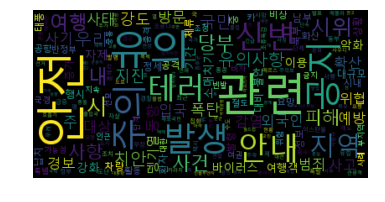

In [24]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate_from_frequencies(frequencies=c)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [29]:
cdf = pd.DataFrame()
cdf['value'] = c.most_common()

In [30]:
cdf

,value
0,"(안전, 2136)"
1,"(관련, 1687)"
2,"(유의, 1340)"
3,"(공지, 1072)"
4,"(주의, 948)"
5,"(발생, 903)"
6,"(안내, 786)"
7,"(신변, 786)"
8,"(테러, 708)"
9,"(지역, 554)"


In [31]:
cdf.to_excel('외교부 명사 리스트.xlsx', index=False)

In [35]:
from konlpy.tag import Okt

stopwords = ['콜센터', '등', '및', '번호', '전', '하다', '하여', '월', '화', '수', '목', '금', '토', '일']

stopwords += country_list

content_noun_list = []
okt = Okt()

for i in range(len(df)):
    _x = df.iloc[i]['content']
    if pd.notnull(_x):
        okt_morphs = okt.pos(_x)  # 튜플반환
        temp_x = []
        for word, pos in okt_morphs:
            if pos == 'Noun':
                temp_x.append(word)

        temp_x = [word for word in temp_x if not word in stopwords]
        content_noun_list += temp_x

In [36]:
from collections import Counter
c2 = Counter(content_noun_list)
print(c2.most_common())
print(c2.most_common(10))

[('발생', 9295), ('지역', 7845), ('안전', 5956), ('시', 5735), ('우리', 4798), ('관련', 4549), ('것', 4229), ('여행', 4125), ('유의', 4115), ('경우', 4107), ('국민', 3946), ('명', 3680), ('방문', 3623), ('시기', 3612), ('상황', 3501), ('사건', 3449), ('테러', 3330), ('대사관', 3260), ('이', 3151), ('주의', 3105), ('신변', 2626), ('긴급', 2621), ('피해', 2456), ('최근', 2413), ('시위', 2385), ('체류', 2306), ('자제', 2255), ('중', 2239), ('연락', 2209), ('내', 1991), ('사고', 1940), ('주', 1905), ('아래', 1903), ('경찰', 1834), ('차량', 1818), ('현지', 1795), ('이용', 1762), ('연락처', 1710), ('당부', 1605), ('후', 1599), ('확인', 1578), ('감염', 1560), ('사망', 1505), ('공지', 1469), ('정부', 1464), ('입국', 1440), ('사항', 1376), ('사례', 1349), ('대한', 1314), ('범죄', 1297), ('안내', 1282), ('함', 1257), ('여행객', 1232), ('치안', 1212), ('외국인', 1190), ('현재', 1185), ('경보', 1165), ('예방', 1162), ('거주', 1156), ('강도', 1149), ('바', 1138), ('장소', 1113), ('국', 1112), ('참고', 1096), ('대한민국', 1084), ('인근', 1033), ('영사관', 1031), ('예정', 1026), ('근무시간', 1013), ('정보', 1011), ('여권', 1011), ('가능성',

In [37]:
cdf2 = pd.DataFrame()
cdf2['value'] = c2.most_common()
cdf2.to_excel('외교부_본문_명사_리스트.xlsx', index=False)